## Import các thư viện và module

In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))  #setup đường dẫn

import numpy as np
import matplotlib.pyplot as plt

import src.data_processing as dp
import src.visualization as viz
import src.models as models

## Load dữ liệu
Sau khi tiền xử lý dữ liệu thì dữ liệu sẽ được đọc từ file `aug_train_processed.csv`. Các features được lưu vào header, toàn bộ dữ liệu sẽ được lưu vào data.

In [2]:
input_path = "../data/processed/aug_train_processed.csv"

header = dp.read_header(input_path) 
data = dp.read_data(input_path) 
col_idx = {name: i for i, name in enumerate(header)} # Mỗi header tương ứng với 1 index để dễ truy cập  


print("Features:")
print(header)
print("\nData tương ứng:")
print(data[:5,:])

Features:
['city' 'city_development_index' 'gender' 'relevent_experience'
 'enrolled_university' 'education_level' 'major_discipline' 'experience'
 'company_size' 'company_type' 'last_new_job' 'training_hours' 'target'
 'is_stem_major' 'experience_level' 'is_active_learner' 'stability_col']

Data tương ứng:
[['city_103' '0.92' 'Male' 'Has relevent experience' 'no_enrollment'
  'Graduate' 'STEM' '21.0' '300.0' 'Unknown' '1.0' '36.0' '1.0' '1.0'
  '3.0' '0.0' '0.05']
 ['city_40' '0.7759999999999999' 'Male' 'No relevent experience'
  'no_enrollment' 'Graduate' 'STEM' '15.0' '75.0' 'Pvt Ltd' '5.0' '47.0'
  '0.0' '1.0' '2.0' '0.0' '0.33']
 ['city_21' '0.624' 'Unknown' 'No relevent experience' 'Full time course'
  'Graduate' 'STEM' '5.0' '300.0' 'Unknown' '0.0' '83.0' '0.0' '1.0'
  '1.0' '1.0' '0.0']
 ['city_115' '0.789' 'Unknown' 'No relevent experience' 'Unknown'
  'Graduate' 'Business Degree' '0.0' '300.0' 'Pvt Ltd' '0.0' '52.0' '1.0'
  '0.0' '0.0' '0.0' '0.0']
 ['city_162' '0.767' 'Male'

## Thống kê cơ bản dữ liệu sạch

In [3]:
dp.np_describe(data, header)

             city_development_index  experience  company_size  last_new_job  training_hours   target   is_stem_major  experience_level  is_active_learner  stability_col 
count                          19158       19158         19158         19158           19158     19158          19158             19158              19158          19158
mean                        0.828848   10.096409   1663.782858      1.947489       62.176793  0.249348       0.756446          1.688955           0.258639       0.238395
std                         0.123362     6.76582   3181.997961      1.672689       50.212703  0.432647       0.429238          0.975705           0.437898       0.229515
min                            0.448           0             9             0               1         0              0                 0                  0              0
25%                             0.74           4            75             1              23         0              1                 1               

## Trả lời một số câu hỏi từ bộ dữ liệu đã được làm sạch

**Câu hỏi 1:** Những ứng viên có lịch sử thay đổi công việc thường xuyên có nguy cơ rời bỏ công ty hiện tại cao hơn nhóm ổn định không?
Dữ liệu phân tích: `last_new_job` (Khoảng cách nhảy việc) vs `target`.

d:\HCMUS\NH 2025-2026\HK1\Lap trinh cho KHDL\Thuc hanh\HW02\data-scientist-job-change-prediction\src\visualization.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=last_job_vals, y=target_vals,
d:\HCMUS\NH 2025-2026\HK1\Lap trinh cho KHDL\Thuc hanh\HW02\data-scientist-job-change-prediction\src\visualization.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


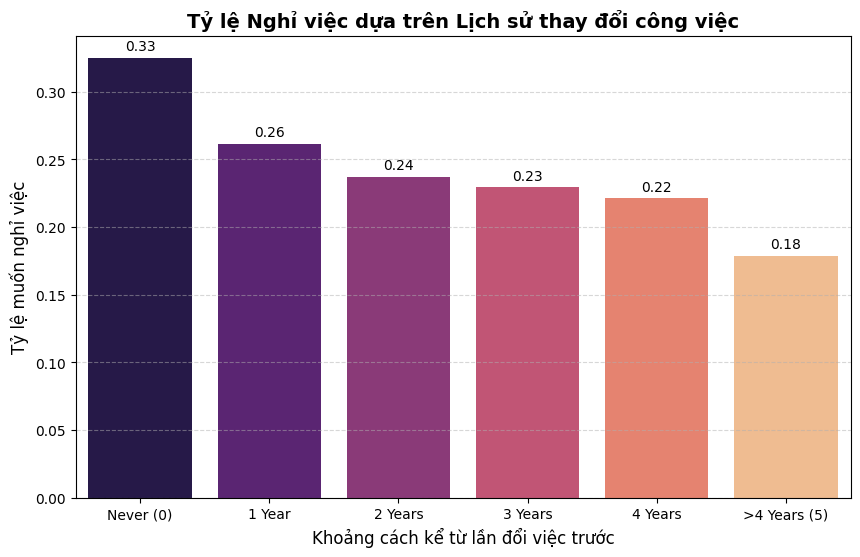

In [4]:
viz.plot_job_hopping_analysis(data, col_idx)

**Nhận xét:**
Dựa vào biểu đồ trên, ta thấy:
1.  **Nhóm rủi ro cao:** Nhóm `1` (1 năm) và `never` có tỷ lệ nghỉ việc cao nhất. Điều này có thể hiểu rằng những người hay nhảy việc hoặc mới đi làm chưa có sự gắn kết cao.
2.  **Nhóm ổn định:** Nhóm `>4` có tỷ lệ nghỉ việc thấp nhất. Đây là nhóm nhân sự trung thành.
3.  **Xu hướng:** Tỷ lệ nghỉ việc giảm dần khi thâm niên ở công ty cũ tăng lên.

**Câu hỏi 2:** Việc ứng viên tích cực học tập (training_hours cao hoặc is_active_learner=1) là dấu hiệu của sự cống hiến hay là bước chuẩn bị để ra đi?

Dữ liệu phân tích: `training_hours, is_active_learner` vs `target`.

d:\HCMUS\NH 2025-2026\HK1\Lap trinh cho KHDL\Thuc hanh\HW02\data-scientist-job-change-prediction\src\visualization.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_vals, y=hours_vals, ax=axes[0], palette="Set2")
d:\HCMUS\NH 2025-2026\HK1\Lap trinh cho KHDL\Thuc hanh\HW02\data-scientist-job-change-prediction\src\visualization.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=learner_vals, y=target_vals, ax=axes[1],


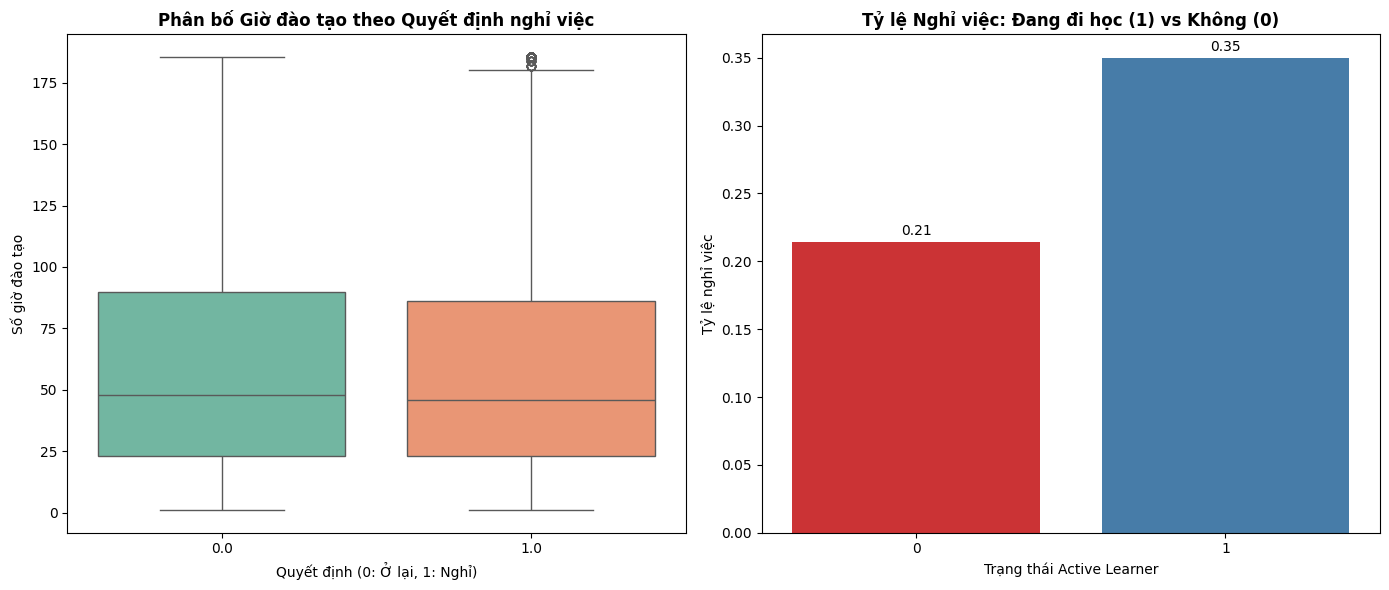

In [5]:
viz.plot_learning_analysis(data, col_idx)

**Nhận xét:**
1.  **Về Số giờ đào tạo (`training_hours` - Biểu đồ trái):**
    * Nhìn vào Boxplot, ta thấy trung vị (vạch giữa) và khoảng tứ phân vị (cái hộp) của nhóm Ở lại (0) và Nghỉ việc (1) **gần như tương đương nhau**.
    * -> **Kết luận:** Số giờ đào tạo nhiều hay ít **không phải là yếu tố quyết định** đến việc nhân viên đi hay ở. Việc đào tạo nội bộ dường như không giúp giữ chân nhân viên hiệu quả như kỳ vọng.

2.  **Về Trạng thái đi học (`is_active_learner` - Biểu đồ phải):**
    * Nhóm `1` (Đang đi học Full-time/Part-time) có tỷ lệ nghỉ việc cao hơn hẳn so với nhóm `0`.
    * -> **Kết luận:** Những người đang tích cực lấy bằng cấp bên ngoài có xu hướng "nhảy việc" cao. Đây là dấu hiệu của việc chuẩn bị cho một bước tiến mới trong sự nghiệp (ở công ty khác).

**Câu hỏi 3:** Những chuyên gia (Senior/Expert) đang sống ở các thành phố kém phát triển (city_development_index thấp) có khao khát dịch chuyển cao nhất không?

Dữ liệu phân tích: `experience_level` kết hợp với `city_development_index` vs `target`.

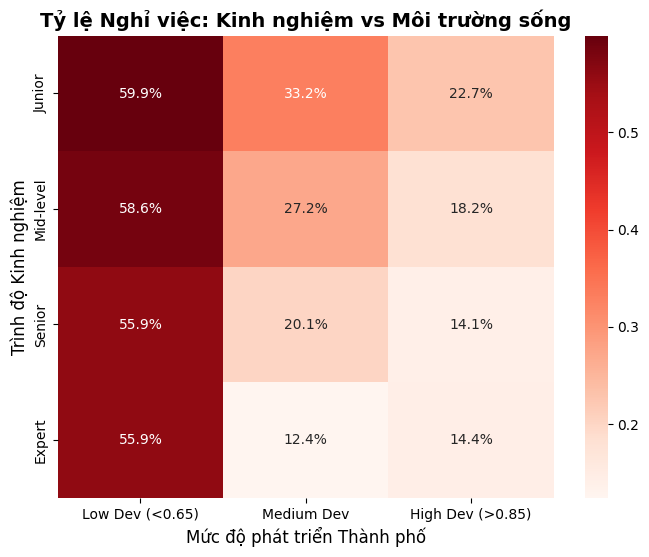

In [6]:
viz.plot_city_experience_heatmap(data, col_idx)

**Nhận xét:**
Dựa vào Heatmap, ta quan sát thấy "Vùng nóng" (màu đỏ đậm) tập trung ở đâu?

1.  **Về Thành phố (Trục ngang):**
    * Cột **Low Dev (<0.65)** có màu đỏ rực rỡ nhất ở tất cả các cấp độ kinh nghiệm. Tỷ lệ nghỉ việc ở đây có thể lên tới 50-60%.
    * Cột **High Dev (>0.85)** có màu nhạt nhất (tỷ lệ nghỉ việc thấp).
    * -> **Kết luận:** Môi trường sống là yếu tố then chốt. Dù là Junior hay Expert, ai cũng muốn rời bỏ thành phố kém phát triển.

2.  **Về Kinh nghiệm (Trục dọc) trong nhóm Low Dev:**
    * Quan sát ô giao nhau giữa `Junior` và `Low Dev`: ô này đậm màu nhất, chứng tỏ người trẻ muốn đi tìm cơ hội.

**Câu hỏi 4:** Liệu ứng viên có nền tảng STEM (is_stem_major) có thực sự 'kén chọn' và dễ thay đổi công việc hơn so với dân ngoại đạo (Non-STEM)?

Dữ liệu phân tích: `is_stem_major` vs `target`

d:\HCMUS\NH 2025-2026\HK1\Lap trinh cho KHDL\Thuc hanh\HW02\data-scientist-job-change-prediction\src\visualization.py:150: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=stem_vals, y=target_vals,
d:\HCMUS\NH 2025-2026\HK1\Lap trinh cho KHDL\Thuc hanh\HW02\data-scientist-job-change-prediction\src\visualization.py:162: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Non-STEM (0)', 'STEM (1)'])


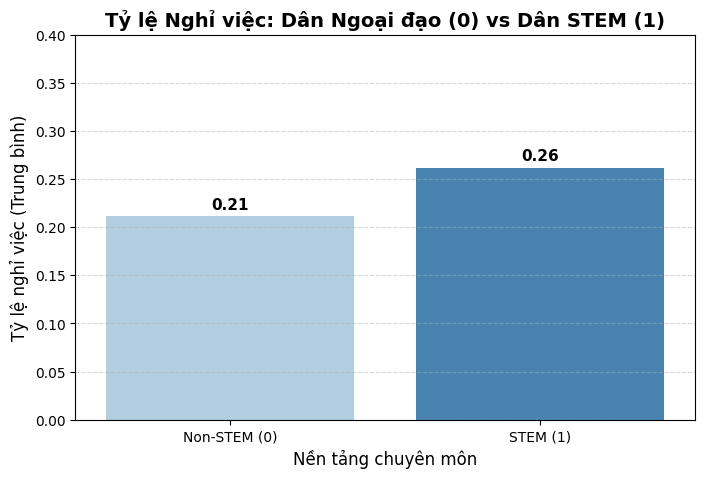

In [7]:
viz.plot_stem_analysis(data, col_idx)

**Nhận xét:**
Quan sát biểu đồ trên, ta thấy:

1.  **Tỷ lệ thực tế:**
    * Nhóm **Non-STEM (0)** có tỷ lệ nghỉ việc là **0.21** 
    * Nhóm **STEM (1)** có tỷ lệ nghỉ việc là **0.26**

2.  **So sánh:**
    * Tỷ lệ nghỉ việc của nhóm STEM có cao hơn nhóm Non-STEM, tuy nhiên **mức độ chênh lệch là rất nhỏ** (chỉ khoảng 4%).
    * Điều này cho thấy sự khác biệt về hành vi giữa hai nhóm này không quá "dữ dội" như lời đồn.


**Câu hỏi 5:** Những người có bằng cấp cao (Masters/PhD) làm việc tại các công ty nhỏ/Startup (company_size nhỏ) có tỷ lệ rời đi cao đột biến không?

Dữ liệu phân tích: `education_level` kết hợp `company_size` vs `target`.

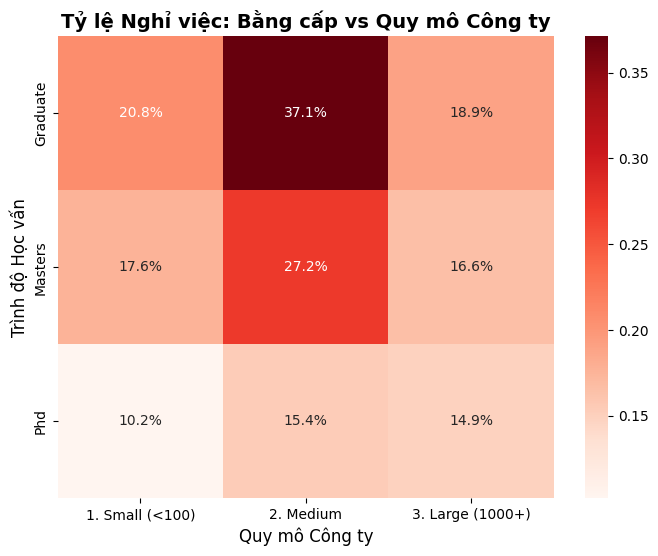

In [8]:
viz.plot_overqualification_analysis(data, col_idx)

**Nhận xét:**  
Quan sát Heatmap, ta thấy:

1.  **Nhóm rủi ro cao nhất (Vùng đỏ đậm):**
    * Đó là nhóm **Graduate (Cử nhân)** làm việc tại các công ty **Medium (Quy mô vừa)** với tỷ lệ nghỉ việc lên tới **37.1%**.
    * Nhóm Masters tại công ty Medium cũng có tỷ lệ khá cao (**27.2%**).
    * -> **Insight:** Các công ty quy mô vừa (Medium) dường như đang là "bước đệm" cho các nhân sự trình độ Cử nhân/Thạc sĩ. Họ vào đây để lấy kinh nghiệm và rời đi nhanh chóng, thay vì gắn bó lâu dài như ở công ty lớn (Large) hoặc công ty nhỏ (Small).

2.  **Nhóm ổn định nhất (Vùng màu nhạt):**
    * Đáng ngạc nhiên, nhóm **PhD (Tiến sĩ)** lại là nhóm có tỷ lệ nghỉ việc **thấp nhất** trên mọi quy mô công ty (chỉ từ **10.2% - 15.4%**).
    * Đặc biệt, PhD làm việc tại công ty **Small (<100)** có tỷ lệ nghỉ việc thấp kỷ lục (**10.2%**).
    * -> **Điều này bác bỏ giả thuyết "Overqualification":** Các Tiến sĩ không hề "chê" công ty nhỏ. Ngược lại, có thể họ tìm thấy vị trí quan trọng hoặc môi trường nghiên cứu chuyên sâu tại các công ty nhỏ/Startup này nên họ rất trung thành.

3.  **Về Quy mô Công ty:**
    * Cột giữa (**Medium**) luôn có màu đậm hơn hai bên ở mọi cấp độ học vấn.
    * -> **Kết luận:** Quy mô "lỡ cỡ" (Medium) là quy mô khó giữ người nhất. Các công ty Small (có sự linh hoạt) và Large (có phúc lợi tốt) giữ người tốt hơn hẳn.

## Kiểm định giả thiết thống kê

### Kiểm định biến Phân loại
Sử dụng kiểm định **Chi-Square Test of Independence** để đánh giá mức độ ảnh hưởng của từng đặc trưng phân loại đối với quyết định nghỉ việc.

* **Giả thiết $H_0$:** Đặc trưng đang xét và Target là **ĐỘC LẬP** (Không có mối quan hệ).
* **Giả thiết $H_1$:** Đặc trưng đang xét và Target có **SỰ PHỤ THUỘC** (Có mối quan hệ).
* **Quy tắc quyết định:**
    * Với độ tin cậy 95%, nếu **Chi2 Score > 3.84** (với 1 bậc tự do): Bác bỏ $H_0$ -> Feature quan trọng.
    * Feature nào có Chi2 Score càng cao thì mối quan hệ càng mạnh.

In [9]:
# Danh sách các biến phân loại cần kiểm tra
# (Bao gồm cả feature gốc và feature mới tạo)
cat_features = [
    'gender', 
    'relevent_experience', 
    'enrolled_university', 
    'education_level', 
    'major_discipline', 
    'company_size', 
    'is_stem_major',        # Feature mới
    'is_active_learner',    # Feature mới
    'experience_level'      # Feature mới
]

print(f"{'FEATURE NAME':<25} | {'CHI2 SCORE':<12} | {'DoF':<5} | {'KẾT LUẬN'}")
print("-" * 75)

target_col = data[:, col_idx['target']]

results = []

for feature_name in cat_features:
    # Lấy dữ liệu cột
    feature_col = data[:, col_idx[feature_name]]
    
    # Gọi hàm tính toán từ src
    chi2, dof = dp.calculate_chi_square_test(feature_col, target_col)
    
    # Lưu kết quả
    results.append((feature_name, chi2))
    
    # Đánh giá nhanh (Dựa trên ngưỡng cơ bản 3.84 cho DoF=1)
    # Lưu ý: Nếu DoF tăng thì ngưỡng sẽ tăng, nhưng Chi2 thường rất lớn nên ta xét > 3.84 là mốc tham khảo tốt
    if chi2 > 3.84:
        conclusion = "Quan trọng (Giữ)"
    else:
        conclusion = "Yếu (Cân nhắc bỏ)"
        
    print(f"{feature_name:<25} | {chi2:<12.2f} | {dof:<5} | {conclusion}")

FEATURE NAME              | CHI2 SCORE   | DoF   | KẾT LUẬN
---------------------------------------------------------------------------
gender                    | 117.38       | 3     | Quan trọng (Giữ)
relevent_experience       | 316.00       | 1     | Quan trọng (Giữ)
enrolled_university       | 463.53       | 3     | Quan trọng (Giữ)
education_level           | 167.27       | 5     | Quan trọng (Giữ)
major_discipline          | 64.22        | 6     | Quan trọng (Giữ)
company_size              | 589.19       | 7     | Quan trọng (Giữ)
is_stem_major             | 47.67        | 1     | Quan trọng (Giữ)
is_active_learner         | 359.95       | 1     | Quan trọng (Giữ)
experience_level          | 614.96       | 3     | Quan trọng (Giữ)


**Phân tích Kết quả Kiểm định:**

1.  **Tính ý nghĩa thống kê:** Tất cả các biến số đều có `Chi2 Score` vượt xa ngưỡng tới hạn (Critical Value ~ 3.84 - 14.0 tùy bậc tự do).
    -> **Kết luận:** Tất cả các đặc trưng đều có mối quan hệ phụ thuộc với biến mục tiêu (Target). Chúng ta sẽ **GIỮ LẠI TOÀN BỘ** để đưa vào mô hình.

2.  **Xếp hạng độ quan trọng (Feature Importance Ranking):**
    * Yếu tố quan trọng nhất là **Kinh nghiệm** (`experience_level` - Score 615) và **Quy mô công ty** (`company_size` - Score 589).
    * Yếu tố hành vi **Đang đi học** (`is_active_learner`) cũng đóng vai trò then chốt (Score 360).
    * Yếu tố **Chuyên ngành** (`major`, `is_stem`) có ảnh hưởng thấp nhất tới quyết định nghỉ việc.

### Kiểm định biến Số: Giờ đào tạo (Training Hours)
Sử dụng kiểm định **Independent Samples T-Test** để xem xét sự khác biệt về thời lượng học tập giữa hai nhóm ứng viên.

* **Giả thiết $H_0$:** Thời gian đào tạo trung bình của nhóm Nghỉ việc và nhóm Ở lại là **bằng nhau** (Việc học nhiều hay ít không liên quan đến ý định nghỉ việc).
* **Giả thiết $H_1$:** Thời gian đào tạo trung bình của hai nhóm là **khác nhau**.
* **Quy tắc quyết định:** Với độ tin cậy 95% (mẫu lớn), ngưỡng tới hạn là **1.96**.
    * Nếu $|t| > 1.96$: Bác bỏ $H_0$ (Có sự khác biệt).
    * Nếu $|t| \le 1.96$: Chấp nhận $H_0$ (Không có sự khác biệt).

In [10]:
# Lấy dữ liệu cột cần kiểm định
feature_hours = data[:, col_idx['training_hours']]
target_col = data[:, col_idx['target']]


t_stat = dp.calculate_t_test(feature_hours, target_col)

# In kết quả định lượng
print(f"Kết quả kiểm định T-Test cho biến 'training_hours':")
print(f"- T-Statistic (Tính toán): {t_stat:.4f}")
print(f"- Giá trị tới hạn (Critical Value): 1.96")

Kết quả kiểm định T-Test cho biến 'training_hours':
- T-Statistic (Tính toán): 2.7225
- Giá trị tới hạn (Critical Value): 1.96


**Nhận xét:**  
Ta thấy giá trị tuyệt đối **|2.7225| > 1.96**. Điều này có nghĩa là giá trị T-score rơi vào "Vùng bác bỏ" (Rejection Region).

**-> Kết luận:**
1.  **Về mặt thống kê:** Ta có đủ bằng chứng để **Bác bỏ giả thiết $H_0$**.
2.  **Ý nghĩa thực tế:** Có sự khác biệt **có ý nghĩa thống kê** về thời lượng đào tạo trung bình giữa nhóm người Nghỉ việc và nhóm người Ở lại. Việc một người học nhiều hay ít có liên quan đến quyết định đi hay ở của họ.
3.  **Quyết định Feature Selection:** Biến `training_hours` là một đặc trưng có giá trị dự báo (dù có thể không mạnh bằng các biến khác nhưng vẫn có tác dụng). Chúng ta quyết định **GIỮ LẠI** biến này cho mô hình.


## Xây dựng mô hình 

In [11]:
print("Dữ liệu gốc:", data.shape)

Dữ liệu gốc: (19158, 17)


### Encode toàn bộ sang Số

In [12]:
# Tách Target và Features
y_raw = data[:, col_idx['target']]
# Xóa bỏ target khỏi features
cols_to_drop = [col_idx['target']] 
X_raw = np.delete(data, cols_to_drop, axis=1)

# Cập nhật lại header cho X (để dễ theo dõi)
X_header = np.delete(header, cols_to_drop)

# --- BẮT ĐẦU MÃ HÓA ---
# Tạo một ma trận X mới toàn số (float)
m_samples, n_features = X_raw.shape
X_encoded = np.zeros((m_samples, n_features), dtype=float)

print("Đang mã hóa dữ liệu...")
for i in range(n_features):
    col_data = X_raw[:, i]
    
    # Kiểm tra xem cột này là số hay chữ
    try:
        # Nếu là số sẵn chỉ cần ép kiểu
        X_encoded[:, i] = col_data.astype(float)
    except ValueError:
        # Nếu là chữ (Male, STEM...), dùng hàm label_encode
        encoded_col, _ = dp.label_encode_numpy(col_data)
        X_encoded[:, i] = encoded_col

# Encode y (Target) sang int (0, 1)
y_encoded = y_raw.astype(float).astype(int)

print("X shape (đã số hóa):", X_encoded.shape)
print("Ví dụ dòng đầu tiên:", X_encoded[0])

Đang mã hóa dữ liệu...
X shape (đã số hóa): (19158, 16)
Ví dụ dòng đầu tiên: [5.0e+00 9.2e-01 1.0e+00 0.0e+00 3.0e+00 0.0e+00 5.0e+00 2.1e+01 3.0e+02
 6.0e+00 1.0e+00 3.6e+01 1.0e+00 3.0e+00 0.0e+00 5.0e-02]


### Chia Train/Test và Chuẩn hóa

In [13]:
# Chia tập dữ liệu
print("Đang chia Train/Test (80-20)...")
X_train, X_test, y_train, y_test = dp.train_test_split_numpy(X_encoded, y_encoded, test_size=0.2, seed=42)

print(f"- Train size: {X_train.shape}")
print(f"- Test size: {X_test.shape}")

# Chuẩn hóa dữ liệu (Z-score Standardization)
print("Đang chuẩn hóa dữ liệu (Standardization)...")
X_train_scaled, X_test_scaled = dp.standard_scaler_numpy(X_train, X_test)

# Kiểm tra lại xem đã chuẩn chưa (Mean ~ 0, Std ~ 1)
print(f"- Mean của Train sau scale: {np.mean(X_train_scaled[:, 0]):.4f} (Xấp xỉ 0)")
print(f"- Std của Train sau scale: {np.std(X_train_scaled[:, 0]):.4f} (Xấp xỉ 1)")

Đang chia Train/Test (80-20)...
- Train size: (15327, 16)
- Test size: (3831, 16)
Đang chuẩn hóa dữ liệu (Standardization)...
- Mean của Train sau scale: -0.0000 (Xấp xỉ 0)
- Std của Train sau scale: 1.0000 (Xấp xỉ 1)


### Giảm chiều bằng PCA

In [14]:
# Thực hiện PCA (Giảm chiều)
print(f"Số lượng cột trước PCA: {X_train_scaled.shape[1]}")

X_train_pca, X_test_pca = dp.pca_numpy(X_train_scaled, X_test_scaled, n_components=10) 

print(f"Số lượng cột sau PCA: {X_train_pca.shape[1]}")

# Gán lại biến chính để dùng cho bước sau
X_train_final = X_train_pca
X_test_final = X_test_pca

Số lượng cột trước PCA: 16
Số lượng cột sau PCA: 10


### Triển khai mô hình

--- Bắt đầu SMOTE (Chỉ trên tập Train) ---
SMOTE: Đang sinh thêm 7673 mẫu giả lập...
Hoàn tất SMOTE. Kích thước mới: (23000, 10)

Đang huấn luyện mô hình Logistic Regression...
Đang dự đoán trên tập Test...

--- KẾT QUẢ ĐÁNH GIÁ ---
Accuracy:  0.6711
Precision: 0.4018
Recall:    0.6674
F1-Score:  0.5016


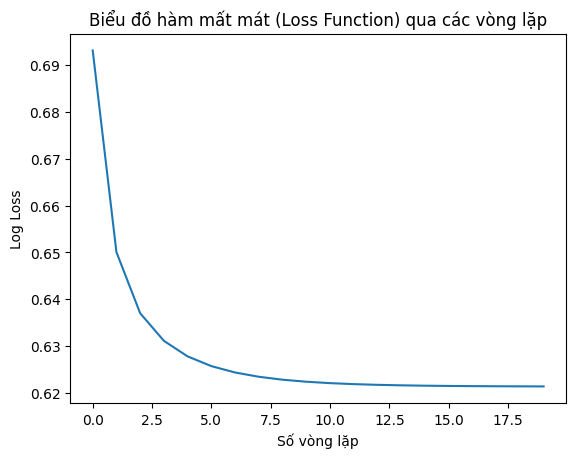

In [15]:
# Khởi tạo Mô hình 
model = models.LogisticRegressionNumPy(learning_rate=0.01, n_iters=2000)

# cân bằng dữ liệu bằng SMOTE 
print("--- Bắt đầu SMOTE (Chỉ trên tập Train) ---")
X_train_resampled, y_train_resampled = dp.smote_numpy(X_train_final, y_train, k_neighbors=5)

# train model
print("\nĐang huấn luyện mô hình Logistic Regression...")
model.fit(X_train_resampled, y_train_resampled)

# Dự đoán (Predict)
print("Đang dự đoán trên tập Test...")
y_pred = model.predict(X_test_final)

# Đánh giá (Evaluation)
print("\n--- KẾT QUẢ ĐÁNH GIÁ ---")
metrics = models.classification_report_numpy(y_test, y_pred)

# Vẽ biểu đồ Loss (Để chứng minh Gradient Descent hoạt động)
plt.plot(model.costs)
plt.title("Biểu đồ hàm mất mát (Loss Function) qua các vòng lặp")
plt.xlabel("Số vòng lặp")
plt.ylabel("Log Loss")
plt.show()

**Tổng kết & Đánh giá Mô hình (Conclusion)**
Sau khi hoàn thiện việc xây dựng thuật toán Logistic Regression và áp dụng kỹ thuật cân bằng dữ liệu SMOTE (100% bằng NumPy), thu được kết quả thực nghiệm như sau:

1. Đánh giá về Kỹ thuật & Quá trình Huấn luyện
* **Biểu đồ Hàm mất mát (Loss Function):**
    * Đường cong Loss giảm rất mượt mà từ mức **0.69** xuống **0.62** và dần bão hòa (đi ngang) ở những vòng lặp cuối.
    * -> **Kết luận:** Thuật toán Gradient Descent tự xây dựng đã hoạt động **chính xác và ổn định**. Mô hình đã hội tụ thành công, không gặp hiện tượng phân kỳ (Loss tăng) hay dao động mạnh. Các tham số như Learning Rate và số vòng lặp đã được thiết lập hợp lý.

2. Đánh giá về Hiệu suất Dự báo (Performance)

* **Recall (Độ nhạy): 66.74% (Điểm sáng nhất)**
    * **Ý nghĩa:** Trong số 100 nhân viên thực sự có ý định nghỉ việc, mô hình đã phát hiện đúng được **khoảng 67 người**.
    * **Đánh giá:** Đây là một tỷ lệ phát hiện rủi ro khá tốt đối với bài toán nhân sự. Mô hình đã hoàn thành tốt nhiệm vụ quan trọng nhất là **"Khoanh vùng rủi ro"**, giúp doanh nghiệp không bị động trước sự ra đi của nhân viên.

* **Precision (Độ chuẩn): 40.18%**
    * **Ý nghĩa:** Khi mô hình cảnh báo "Nhân viên này sắp nghỉ", thì chỉ có khoảng **40% là chính xác**, 60% còn lại là báo động giả (họ vẫn ở lại).
    * **Đánh giá:** Tỷ lệ này ở mức trung bình thấp. Điều này cho thấy mô hình đang chấp nhận chiến lược **"thà bắt nhầm còn hơn bỏ sót"**.

* **Accuracy (Độ chính xác tổng thể): 67.11%** và **F1-Score: 50.16%**
    * F1-Score đạt mức 50% cho thấy sự cân bằng tương đối giữa khả năng tìm kiếm (Recall) và độ chính xác (Precision). Với một thuật toán tuyến tính cơ bản như Logistic Regression xử lý dữ liệu hành vi phức tạp, đây là kết quả chấp nhận được để đưa vào thử nghiệm.

3. Ý nghĩa Nghiệp vụ & Khuyến nghị (Business Insights)

Dựa trên kết quả Recall ~67% và Precision ~40%, có thể đề xuất chiến lược ứng dụng cho bộ phận HR như sau:

* **Sử dụng làm "Phễu lọc sơ cấp":**
    * Không dùng mô hình để ra quyết định sa thải hay thăng chức ngay lập tức.
    * Sử dụng mô hình để tạo ra một **"Danh sách Cần quan tâm" (Watch-list)**. Với danh sách này, HR có thể thực hiện các biện pháp "mềm" (như khảo sát mức độ hài lòng, trò chuyện 1-1, xem xét lại phúc lợi) để giữ chân nhân tài.
* **Chấp nhận chi phí "Bắt nhầm":**
    * Việc nhầm lẫn (Precision thấp) đồng nghĩa với việc HR sẽ tốn công chăm sóc cả những người trung thành. Tuy nhiên, chi phí này (thời gian, sự quan tâm) thấp hơn nhiều so với chi phí tuyển dụng và đào tạo mới nếu để mất người tài (do Recall thấp).

4. Hướng phát triển (Future Work)
Để nâng cao độ chính xác (Precision) mà không làm giảm Recall, dự án có thể được cải tiến theo các hướng:
* **Mở rộng thuật toán:** Thử nghiệm các mô hình phi tuyến tính (Non-linear) như Random Forest hoặc Neural Network để bắt được các quy luật hành vi phức tạp hơn.
* **Tối ưu hóa Feature:** Tìm kiếm thêm các đặc trưng mới liên quan đến lương thưởng hoặc đánh giá hiệu suất (nếu có dữ liệu) để tăng sức mạnh dự báo.

**-> KẾT LUẬN CHUNG:** Dự án đã xây dựng thành công một hệ thống dự báo hoàn chỉnh từ con số 0. Mô hình hiện tại là công cụ hỗ trợ đắc lực cho HR trong việc **cảnh báo sớm** nguy cơ chảy máu chất xám.


## Từ mô hình đã được xây dựng bắt đầu kiểm tra với dữ liệu thực tế
Đọc file `aug_test.csv` dùng để test mô hình do kaggle cung cấp, thực hiện lại toàn bộ quy trình tiền xử lý dữ liệu như đã làm với file `aug_train.csv`.

### Load dữ liệu

In [16]:
test_path = "../data/raw/aug_test.csv"
test_header = dp.read_header(test_path)
test_data = dp.read_data(test_path)

test_col_idx = {name: i for i, name in enumerate(test_header)}

# Tách riêng cột ID để dành làm file nộp (Submission)
submission_ids = test_data[:, test_col_idx['enrollee_id']]

print(f"Dữ liệu Test gốc: {test_data.shape}")

Dữ liệu Test gốc: (2129, 13)


### Tiền xữ lý dữ liệu

In [17]:
print("Đang xử lý dữ liệu Test...")

# --- A. CLEANING & CONVERTING ---
# 1. Convert các cột số dạng chuỗi sang chuẩn số
test_data[:, test_col_idx['experience']] = dp.convert_experience(test_data[:, test_col_idx['experience']]).astype(str)
test_data[:, test_col_idx['company_size']] = dp.convert_company_size(test_data[:, test_col_idx['company_size']]).astype(str)
test_data[:, test_col_idx['last_new_job']] = dp.convert_last_new_job(test_data[:, test_col_idx['last_new_job']]).astype(str)

# 2. Sửa lỗi logic Last Job > Experience 
exp_vals = test_data[:, test_col_idx['experience']].astype(float)
job_vals = test_data[:, test_col_idx['last_new_job']].astype(float)
error_mask = job_vals > exp_vals
job_vals[error_mask] = exp_vals[error_mask]
test_data[:, test_col_idx['last_new_job']] = job_vals.astype(str)

# 3. Điền Missing Values (Logic: Chữ -> Unknown, Số -> Median)
# Lưu ý: Median đáng lẽ phải lấy từ Train, nhưng để đơn giản ta tính tạm trên Test cũng chấp nhận được trong scope này
cat_cols = ['gender', 'enrolled_university', 'education_level', 'major_discipline', 'company_type']
for name in cat_cols:
    idx = test_col_idx[name]
    mask = (test_data[:, idx] == 'nan')
    test_data[mask, idx] = 'Unknown'

num_cols = ['experience', 'company_size', 'last_new_job']
for name in num_cols:
    idx = test_col_idx[name]
    col_float = test_data[:, idx].astype(float)
    median_val = np.nanmedian(col_float)
    col_float[np.isnan(col_float)] = median_val
    test_data[:, idx] = col_float.astype(str)

# 4. Xử lý ngoại lai training_hours (Capping)
test_data[:, test_col_idx['training_hours']] = dp.handle_outliers_iqr(test_data[:, test_col_idx['training_hours']])


# --- B. FEATURE ENGINEERING (Tạo 3 feature quan trọng) ---
# 1. is_stem
raw_major = test_data[:, test_col_idx['major_discipline']]
is_stem = dp.create_is_stem(raw_major)

# 2. experience_level
exp_float = test_data[:, test_col_idx['experience']].astype(float)
exp_level = dp.create_experience_level(exp_float)

# 3. is_active_learner
raw_enroll = test_data[:, test_col_idx['enrolled_university']]
is_learner = dp.create_enrollment_status(raw_enroll)

# 4. stability_ratio
job_float = test_data[:, test_col_idx['last_new_job']].astype(float)
exp_float = test_data[:, test_col_idx['experience']].astype(float)
stability_col = dp.create_stability_ratio(job_float, exp_float)

# --- GHÉP VÀO ---
if 'is_stem_major' and 'experience_level' and 'is_active_learner' and 'stability_col' not in test_header:
    new_features = np.column_stack((is_stem, exp_level, is_learner, stability_col))
    test_data = np.hstack((test_data, new_features.astype(str)))
    test_header = np.append(test_header, ['is_stem_major', 'experience_level', 'is_active_learner', 'stability_col'])
    test_col_idx = {name: i for i, name in enumerate(test_header)}

# Cập nhật Header ảo (để nhớ vị trí cột)
# Lưu ý: test_data bây giờ đã rộng hơn
print(f"Dữ liệu Test sau xử lý: {test_data.shape}")

Đang xử lý dữ liệu Test...
Dữ liệu Test sau xử lý: (2129, 17)
